In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
olympics = pd.read_csv("athlete_events.csv")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Choose the Best Visualization for Each Metric

### a) Age

In [81]:
ages = olympics.groupby('Age').count()
ages = ages[['ID']]
ages.reset_index(inplace=True)
# ages.rename(columns={'ID':'Proportion'}, inplace=True)
#ages['ID'] = (ages['ID'] / sum(ages['ID'])) * 100
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
sums = []
sums.append(sum(ages[(ages.Age >= 10) & (ages.Age < 20)]['ID']))
sums.append(sum(ages[(ages.Age >= 20) & (ages.Age < 30)]['ID']))
sums.append(sum(ages[(ages.Age >= 30) & (ages.Age < 40)]['ID']))
sums.append(sum(ages[(ages.Age >= 40) & (ages.Age < 50)]['ID']))
sums.append(sum(ages[(ages.Age >= 50) & (ages.Age < 60)]['ID']))
sums.append(sum(ages[(ages.Age >= 60) & (ages.Age < 70)]['ID']))
sums.append(sum(ages[(ages.Age >= 70) & (ages.Age < 80)]['ID']))
sums.append(sum(ages[(ages.Age >= 80) & (ages.Age < 90)]['ID']))
sums.append(sum(ages[(ages.Age >= 90) & (ages.Age < 100)]['ID']))

age_ranges = pd.DataFrame()
age_ranges['Ages'] = labels
age_ranges['Total'] = sums
age_ranges['Proportion'] = (age_ranges['Total'] / sum(age_ranges['Total'])) * 100
age_ranges

,Ages,Total,Proportion
0,10-20,32303,12.346259
1,20-30,177744,67.934047
2,30-40,42684,16.313895
3,40-50,6695,2.558840
4,50-60,1558,0.595470
5,60-70,529,0.202185
6,70-80,118,0.045100
7,80-90,9,0.003440
8,90-100,2,0.000764


#### Pie Chart

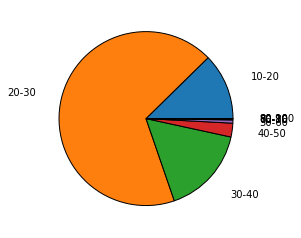

In [100]:
fig1, ax1 = plt.subplots()
ax1.pie(age_ranges['Proportion'], labels=age_ranges['Ages'], labeldistance=1.3)
plt.show()

#### Bar Chart

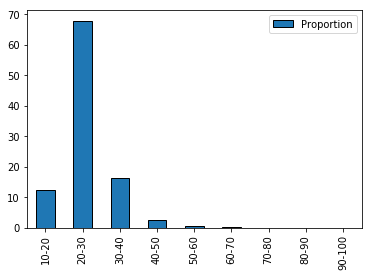

In [98]:
age_ranges[['Proportion']].plot.bar()
x_pos = [i for i, _ in enumerate(age_ranges['Ages'])]
plt.xticks(x_pos, age_ranges['Ages'])
plt.show()

#### Line Plot

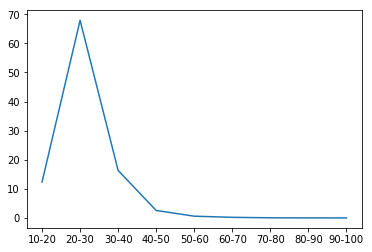

In [106]:
age_ranges['Proportion'].plot()
plt.xticks(x_pos, age_ranges['Ages'])
plt.show()

Which plot best displays the ages of olympians? Why? Outline the shortcomings of the other visualizations.

**Answer Here**

### Weight by Team

In [159]:
avg_weights = olympics[['Weight', 'Team']].groupby('Team').mean().dropna()
avg_weights.reset_index(inplace=True)
avg_weights = avg_weights.iloc[range(30)]
avg_weights.head()

,Team,Weight
0,30. Februar,70.000000
1,Acipactli,75.333333
2,Afghanistan,65.901639
3,Akatonbo,80.000000
4,Alain IV,89.333333


#### Scatter Plot

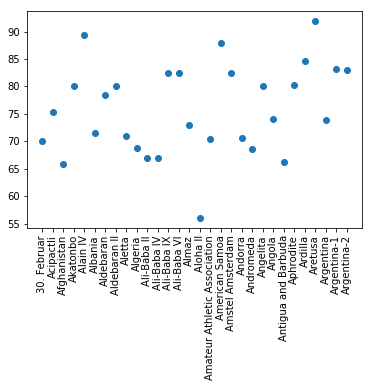

In [160]:
plt.scatter(avg_weights['Team'], avg_weights['Weight'])
plt.xticks(rotation='vertical')
plt.show()

#### Bar Chart

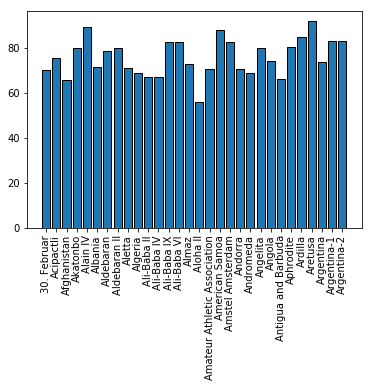

In [161]:
plt.bar(avg_weights['Team'], avg_weights['Weight'])
plt.xticks(rotation='vertical')
plt.show()

Which plot best displays the weights of olympians by team? Why? Outline the shortcomings of the other visualizations.

**Answer Here**

### U.S. Medals Won by Year

In [188]:
medals = olympics[['Year', 'Team', 'Medal']]
medals = medals[medals['Team'] == 'United States']
temp = medals[['Medal']]
temp[temp['Medal'] != 0] = 1
medals['Medal'] = temp['Medal']
medals = medals.groupby('Year').sum().reset_index()
medals.head()

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Medal
0,1896,20
1,1900,45
2,1904,199
3,1906,24
4,1908,65


#### Bar Chart

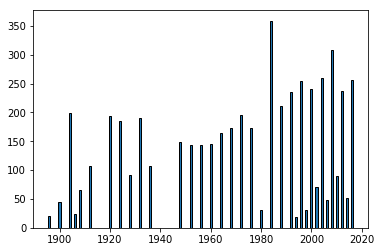

In [190]:
plt.bar(medals['Year'], medals['Medal'])
plt.show()

#### Line Plot

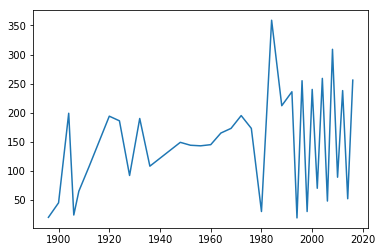

In [194]:
plt.plot(medals['Year'], medals['Medal'])
plt.show()

#### Scatter Plot

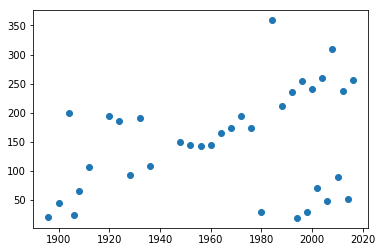

In [196]:
plt.scatter(medals['Year'], medals['Medal'])
plt.show()

Which plot best displays the number of medals U.S. olympians won each year? Why? Outline the shortcomings of the other visualizations.

**Answer Here**

### Top 20 Countries by Total Medals

In [218]:
all_medals = olympics[['Team', 'Medal']]
all_temp = all_medals[['Medal']]
all_temp[all_temp['Medal'] != 0] = 1
all_medals['Medal'] = all_temp['Medal']
all_medals = all_medals.groupby('Team').sum()
all_medals = all_medals[all_medals['Medal'] > 0]
all_medals = all_medals.sort_values('Medal', ascending=False).reset_index()
top_20 = all_medals.iloc[range(20)]
top_20

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Team,Medal
0,United States,5219
1,Soviet Union,2451
2,Germany,1984
3,Great Britain,1673
4,France,1550
5,Italy,1527
6,Sweden,1434
7,Australia,1306
8,Canada,1243
9,Hungary,1127


#### Bar Chart

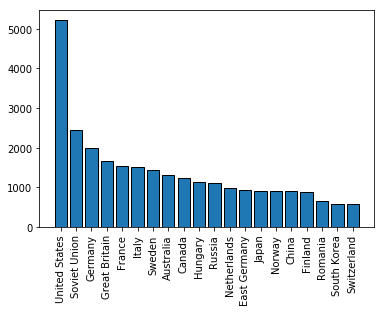

In [222]:
plt.bar(top_20['Team'], top_20['Medal'])
plt.xticks(rotation='vertical')
plt.show()

#### Pie Chart

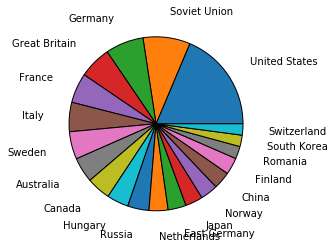

In [228]:
fig1, ax2 = plt.subplots()
ax2.pie(top_20['Medal'], labels=top_20['Team'], labeldistance=1.3)
plt.show()

#### Scatter Plot

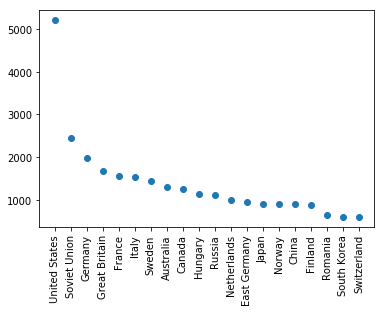

In [224]:
plt.scatter(top_20['Team'], top_20['Medal'])
plt.xticks(rotation='vertical')
plt.show()

Which plot best displays the comparison of medals won between the top 20 countries won? Why? Outline the shortcomings of the other visualizations.

**Answer Here**